# 40 Years Weather Data Exploratory Anaysis

In [91]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import warnings
import csv
import os
import sys

from collections import defaultdict, Counter

%matplotlib inline

sb.set()
sb.set_style('ticks')
sb.set_palette('Accent')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

warnings.filterwarnings('ignore')

In [92]:
df = pd.read_excel("D:\Open Classroom\Datasets\daily weather data 40 years\ICRISAT Weather 1978 to 2018.xlsx")
df.head()

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723,0.0
1,ICRISAT,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723,0.0
2,ICRISAT,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723,0.0
3,ICRISAT,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723,0.0
4,ICRISAT,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723,0.0


In [93]:
df.shape

(14853, 15)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14853 entries, 0 to 14852
Data columns (total 15 columns):
Station      14853 non-null object
Date         14853 non-null datetime64[ns]
MaxT         14853 non-null float64
MinT         14853 non-null float64
RH1          14853 non-null int64
RH2          14853 non-null float64
Wind         14853 non-null float64
Rain         14853 non-null float64
SSH          14853 non-null float64
Evap         14853 non-null float64
Radiation    14852 non-null float64
FAO56_ET     14853 non-null float64
Lat          14853 non-null float64
Lon          14853 non-null float64
Cum_Rain     14853 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.7+ MB


In [95]:
round(df.describe(), 2).style.background_gradient(cmap = 'cool')

,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
count,14853,14853,14853,14853,14853,14853,14853,14853,14852,14853,14853,14853,14853
mean,32.06,19.57,81.59,43.55,8.69,2.46,7.46,6.42,17.88,4.81,17.51,78.27,386.07
std,4.12,4.5,15.06,19.61,4.8,9.35,3.34,3.13,4.51,1.82,0,0,398.75
min,16.5,4.5,17,6.3,0.2,0,0,0,0.8,0.4,17.51,78.27,0
25%,29,16.5,75,28,5.2,0,5.5,4.2,15.5,3.5,17.51,78.27,29.6
50%,31,21,87,40,7.6,0,8.8,5.6,18.2,4.4,17.51,78.27,225.4
75%,35,22.6,93,57,11.2,0,10.1,8.3,21.1,5.9,17.51,78.27,687.7
max,43.5,30.6,100,100,56,263.6,12.4,19.7,28.3,13.6,17.51,78.27,1520.4


In [96]:
df.head(10)

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723,0.0
1,ICRISAT,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723,0.0
2,ICRISAT,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723,0.0
3,ICRISAT,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723,0.0
4,ICRISAT,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723,0.0
5,ICRISAT,1978-01-06,27.2,19.4,86,49.0,13.5,0.0,9.5,5.1,13.8,4.0,17.508409,78.2723,0.0
6,ICRISAT,1978-01-07,26.5,19.5,85,46.0,11.4,0.0,5.4,4.7,13.0,3.8,17.508409,78.2723,0.0
7,ICRISAT,1978-01-08,27.2,18.5,92,51.0,11.7,16.5,5.0,4.2,14.2,3.7,17.508409,78.2723,16.5
8,ICRISAT,1978-01-09,26.8,18.5,90,47.0,12.0,0.0,7.7,3.6,13.4,3.8,17.508409,78.2723,16.5
9,ICRISAT,1978-01-10,28.2,19.5,91,71.0,11.9,0.7,5.4,3.4,11.8,3.0,17.508409,78.2723,17.2


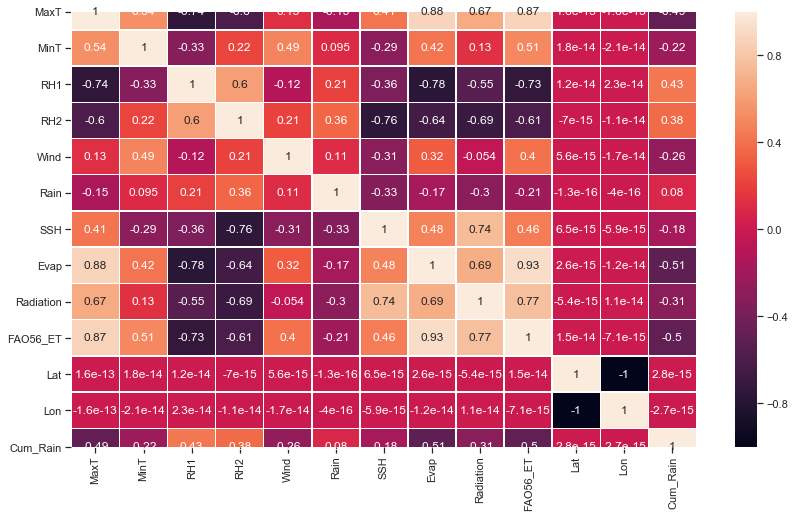

In [97]:
plt.figure(figsize = (14, 8))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)

In [98]:
df.head()

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723,0.0
1,ICRISAT,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723,0.0
2,ICRISAT,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723,0.0
3,ICRISAT,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723,0.0
4,ICRISAT,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723,0.0


### Data Cleaning and Manipulation

In [99]:
df.set_index(df['Date'])
df.head()

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,Radiation,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,18.4,3.9,17.508409,78.2723,0.0
1,ICRISAT,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,16.9,3.9,17.508409,78.2723,0.0
2,ICRISAT,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,15.3,3.4,17.508409,78.2723,0.0
3,ICRISAT,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,16.4,3.8,17.508409,78.2723,0.0
4,ICRISAT,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,15.9,4.1,17.508409,78.2723,0.0


In [100]:
null_pct = df.apply(pd.isnull).sum() / df.shape[1]

In [101]:
valid_cols = df.columns[ null_pct < 0.05] # Extracting cols with less than 5% missing vals
valid_cols

Index(['Station', 'Date', 'MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH',
       'Evap', 'FAO56_ET', 'Lat', 'Lon', 'Cum_Rain'],
      dtype='object')

In [102]:
df = df[valid_cols].copy()
df.head()

,Station,Date,MaxT,MinT,RH1,RH2,Wind,Rain,SSH,Evap,FAO56_ET,Lat,Lon,Cum_Rain
0,ICRISAT,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0
1,ICRISAT,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0
2,ICRISAT,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0
3,ICRISAT,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0
4,ICRISAT,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0


In [103]:
df.columns = df.columns.str.lower()
df.head()

,station,date,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain
0,ICRISAT,1978-01-01,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0
1,ICRISAT,1978-01-02,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0
2,ICRISAT,1978-01-03,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0
3,ICRISAT,1978-01-04,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0
4,ICRISAT,1978-01-05,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0


In [104]:
df.set_index('date', inplace = True)

In [105]:
df.head()

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain
date,,,,,,,,,,,,,
1978-01-01,ICRISAT,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0
1978-01-02,ICRISAT,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0
1978-01-03,ICRISAT,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0
1978-01-04,ICRISAT,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0
1978-01-05,ICRISAT,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0


In [106]:
df = df.ffill() # Replace NULL values with the value from the previous row
df.apply(pd.isnull).sum()

station     0
maxt        0
mint        0
rh1         0
rh2         0
wind        0
rain        0
ssh         0
evap        0
fao56_et    0
lat         0
lon         0
cum_rain    0
dtype: int64

In [107]:
df.dtypes

station      object
maxt        float64
mint        float64
rh1           int64
rh2         float64
wind        float64
rain        float64
ssh         float64
evap        float64
fao56_et    float64
lat         float64
lon         float64
cum_rain    float64
dtype: object

In [108]:
df.index

DatetimeIndex(['1978-01-01', '1978-01-02', '1978-01-03', '1978-01-04',
               '1978-01-05', '1978-01-06', '1978-01-07', '1978-01-08',
               '1978-01-09', '1978-01-10',
               ...
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
               '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29',
               '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', name='date', length=14853, freq=None)

In [109]:
# Check whether index series has gaps in the yr subset
df.index.year.value_counts().sort_index()

1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    243
Name: date, dtype: int64

In [110]:
df.head()

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain
date,,,,,,,,,,,,,
1978-01-01,ICRISAT,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0
1978-01-02,ICRISAT,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0
1978-01-03,ICRISAT,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0
1978-01-04,ICRISAT,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0
1978-01-05,ICRISAT,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0


Text(0.5, 1.0, 'Max Temperatures on Yearly Basis')

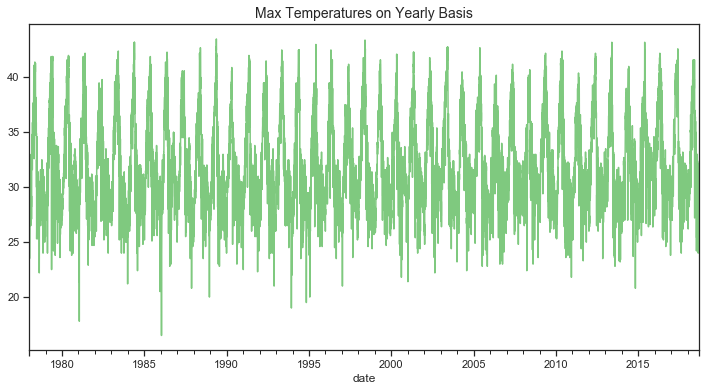

In [111]:
plt.figure(figsize = (12, 6))
df['maxt'].plot()
plt.title('Max Temperatures on Yearly Basis', fontdict = {'size':14})

Text(0.5, 1.0, 'Relative Humidity on Yearly Basis')

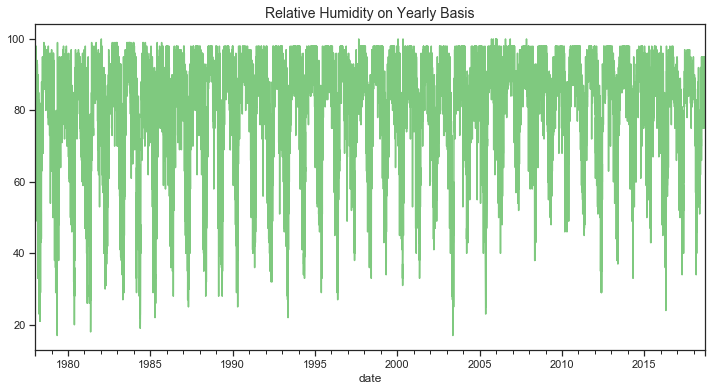

In [112]:
plt.figure(figsize = (12, 6))
df['rh1'].plot()
plt.title('Relative Humidity on Yearly Basis', fontdict = {'size':14})

Text(0.5, 1.0, 'Wind Frequency on Yearly Basis')

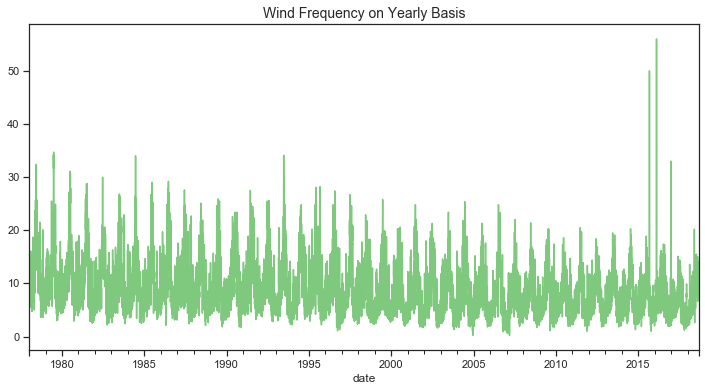

In [113]:
plt.figure(figsize = (12, 6))
df['wind'].plot()
plt.title('Wind Frequency on Yearly Basis', fontdict = {'size':14})

Text(0.5, 1.0, 'Rain collection on Yearly Basis')

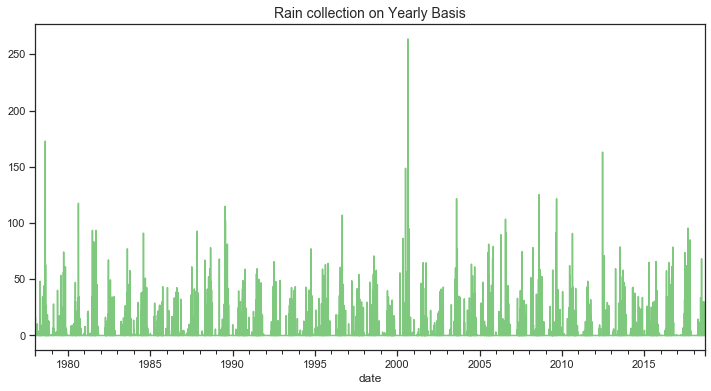

In [114]:
plt.figure(figsize = (12, 6))
df['rain'].plot()
plt.title('Rain collection on Yearly Basis', fontdict = {'size':14})

Text(0.5, 1.0, 'Sea Surface Height record on Yearly Basis')

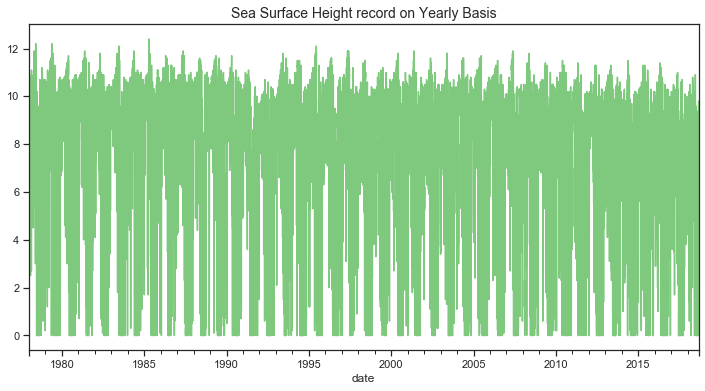

In [115]:
plt.figure(figsize = (12, 6))
df['ssh'].plot()
plt.title('Sea Surface Height record on Yearly Basis', fontdict = {'size':14})

Text(0.5, 1.0, 'Evaporation Record on Yearly Basis')

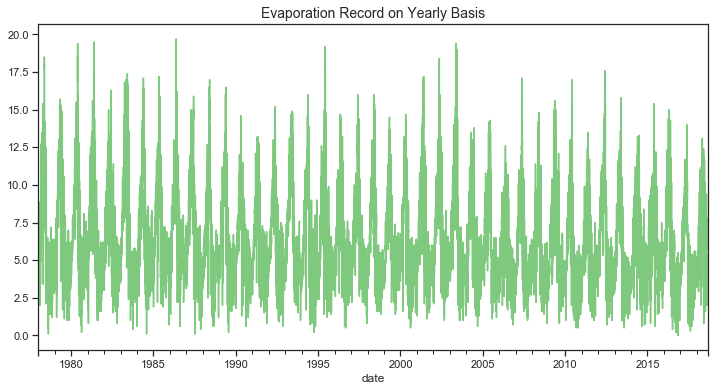

In [116]:
plt.figure(figsize = (12, 6))
df['evap'].plot()
plt.title('Evaporation Record on Yearly Basis', fontdict = {'size':14})

## Feature Engineering

In [117]:
df.head()

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain
date,,,,,,,,,,,,,
1978-01-01,ICRISAT,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0
1978-01-02,ICRISAT,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0
1978-01-03,ICRISAT,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0
1978-01-04,ICRISAT,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0
1978-01-05,ICRISAT,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0


In [118]:
# use machine learning techniques to predict tomorrows temperature
# we apply shift method to predict the target temp
df['target'] = df.shift(-1)['maxt']
df

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target
date,,,,,,,,,,,,,,
1978-01-01,ICRISAT,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0,28.8
1978-01-02,ICRISAT,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0,29.0
1978-01-03,ICRISAT,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0,29.0
1978-01-04,ICRISAT,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0,27.8
1978-01-05,ICRISAT,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,ICRISAT,29.5,22.2,93,64.0,9.6,4.5,1.4,2.5,3.5,17.508409,78.2723,1493.2,29.2
2018-08-28,ICRISAT,29.2,22.6,90,70.0,9.2,13.2,0.4,4.7,3.2,17.508409,78.2723,1506.4,29.6
2018-08-29,ICRISAT,29.6,22.4,91,63.0,7.6,14.0,2.9,3.6,3.7,17.508409,78.2723,1520.4,30.6


In [119]:
# If you take a look at the last row in the df, you realise that we have a NaN value which cannot provide the value for the next day,
# However using the ffill method to fill the Nan val with the previous val will solve the issue
df = df.ffill()
df

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target
date,,,,,,,,,,,,,,
1978-01-01,ICRISAT,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0,28.8
1978-01-02,ICRISAT,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0,29.0
1978-01-03,ICRISAT,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0,29.0
1978-01-04,ICRISAT,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0,27.8
1978-01-05,ICRISAT,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,ICRISAT,29.5,22.2,93,64.0,9.6,4.5,1.4,2.5,3.5,17.508409,78.2723,1493.2,29.2
2018-08-28,ICRISAT,29.2,22.6,90,70.0,9.2,13.2,0.4,4.7,3.2,17.508409,78.2723,1506.4,29.6
2018-08-29,ICRISAT,29.6,22.4,91,63.0,7.6,14.0,2.9,3.6,3.7,17.508409,78.2723,1520.4,30.6


In [120]:
from sklearn.linear_model import Ridge # importing Ridge Regression from linear model

In [121]:
rr = Ridge(alpha=.1) # instance of the model

In [122]:
predictors = df.columns[~df.columns.isin(['station', 'lat', 'lon', 'target'])] # Exclude these columns from predictions for the model accuracy
predictors

Index(['maxt', 'mint', 'rh1', 'rh2', 'wind', 'rain', 'ssh', 'evap', 'fao56_et',
       'cum_rain'],
      dtype='object')

In [123]:
# Define a function for the Time series validation to ascertain prediction of the future and not vice versa
# Model prediction using 10yrs range as our start period
def backtest(df, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, df.shape[0], step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train['target'])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index = test.index)
        
        combined = pd.concat([test['target'], preds], axis = 1)
        
        combined.columns = ['actual', 'prediction']
        
        combined['diff'] = (combined['prediction'] - combined['actual']).abs()
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions, axis = 0)
        
        

In [124]:
predictions = backtest(df, rr, predictors)

In [125]:
predictions

,actual,prediction,diff
date,,,
1987-12-30,26.8,27.048868,0.248868
1987-12-31,26.5,26.509838,0.009838
1988-01-01,26.4,27.031154,0.631154
1988-01-02,25.5,27.389145,1.889145
1988-01-03,26.0,26.191210,0.191210
...,...,...,...
2018-08-27,29.2,29.413610,0.213610
2018-08-28,29.6,29.124255,0.475745
2018-08-29,30.6,29.368209,1.231791


In [126]:
# Generate Model Accuracy Metrics using the MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions['actual'], predictions['prediction'])

# conclusion
# from the error below, we can indicate that we are 1 degree off from accurate prediction

1.0544020538985903

In [127]:
predictions['diff'].mean() # similar approach

1.0544020538985883

In [128]:
# Generate functions to improve the accuracy
def pct_diff(old, new):
    return (new - old) / old # calculate the pct difference

def compute_rolling(df, horizon, col): # compute the number of days for the past few days based on horizon (no. of days)
    label = f"rolling_{horizon}_{col}"
    
    df[label] = df[col].rolling(horizon).mean() # compute the mean of the horizon col
    df[f"{label}_pct"] = pct_diff(df[label], df[col])
    
    return df

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ['maxt', 'mint']:
        df = compute_rolling(df, horizon, col)
        
df.head(15)

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target,rolling_3_maxt,rolling_3_maxt_pct,rolling_3_mint,rolling_3_mint_pct,rolling_14_maxt,rolling_14_maxt_pct,rolling_14_mint,rolling_14_mint_pct
date,,,,,,,,,,,,,,,,,,,,,,
1978-01-01,ICRISAT,28.5,14.2,68,31.0,5.7,0.0,10.1,4.3,3.9,17.508409,78.2723,0.0,28.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-01-02,ICRISAT,28.8,16.0,79,33.0,6.4,0.0,9.8,4.8,3.9,17.508409,78.2723,0.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-01-03,ICRISAT,29.0,14.5,86,37.0,5.4,0.0,9.1,4.6,3.4,17.508409,78.2723,0.0,29.0,28.766667,0.008111,14.900000,-0.026846,NaN,NaN,NaN,NaN
1978-01-04,ICRISAT,29.0,18.0,89,43.0,7.1,0.0,9.0,4.2,3.8,17.508409,78.2723,0.0,27.8,28.933333,0.002304,16.166667,0.113402,NaN,NaN,NaN,NaN
1978-01-05,ICRISAT,27.8,17.0,81,47.0,10.5,0.0,8.9,4.3,4.1,17.508409,78.2723,0.0,27.2,28.600000,-0.027972,16.500000,0.030303,NaN,NaN,NaN,NaN
1978-01-06,ICRISAT,27.2,19.4,86,49.0,13.5,0.0,9.5,5.1,4.0,17.508409,78.2723,0.0,26.5,28.000000,-0.028571,18.133333,0.069853,NaN,NaN,NaN,NaN
1978-01-07,ICRISAT,26.5,19.5,85,46.0,11.4,0.0,5.4,4.7,3.8,17.508409,78.2723,0.0,27.2,27.166667,-0.024540,18.633333,0.046512,NaN,NaN,NaN,NaN
1978-01-08,ICRISAT,27.2,18.5,92,51.0,11.7,16.5,5.0,4.2,3.7,17.508409,78.2723,16.5,26.8,26.966667,0.008653,19.133333,-0.033101,NaN,NaN,NaN,NaN
1978-01-09,ICRISAT,26.8,18.5,90,47.0,12.0,0.0,7.7,3.6,3.8,17.508409,78.2723,16.5,28.2,26.833333,-0.001242,18.833333,-0.017699,NaN,NaN,NaN,NaN


In [129]:
df = df.iloc[14:,:]
df.head(10)

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target,rolling_3_maxt,rolling_3_maxt_pct,rolling_3_mint,rolling_3_mint_pct,rolling_14_maxt,rolling_14_maxt_pct,rolling_14_mint,rolling_14_mint_pct
date,,,,,,,,,,,,,,,,,,,,,,
1978-01-15,ICRISAT,27.8,12.0,94,28.0,6.4,0.0,10.3,4.2,3.2,17.508409,78.2723,17.2,28.0,26.500000,4.905660e-02,10.966667,0.094225,26.942857,0.031813,15.835714,-0.242219
1978-01-16,ICRISAT,28.0,13.2,93,26.0,9.1,0.0,10.1,4.9,4.5,17.508409,78.2723,17.2,27.9,27.366667,2.314251e-02,11.900000,0.109244,26.885714,0.041445,15.635714,-0.155779
1978-01-17,ICRISAT,27.9,12.6,86,20.0,8.4,0.0,10.2,4.1,4.6,17.508409,78.2723,17.2,29.1,27.900000,-1.273374e-16,12.600000,0.000000,26.807143,0.040767,15.500000,-0.187097
1978-01-18,ICRISAT,29.1,14.0,79,26.0,5.6,0.0,10.1,4.2,4.1,17.508409,78.2723,17.2,29.4,28.333333,2.705882e-02,13.266667,0.055276,26.814286,0.085242,15.214286,-0.079812
1978-01-19,ICRISAT,29.4,13.5,73,25.0,6.1,0.0,9.8,4.9,4.3,17.508409,78.2723,17.2,29.6,28.800000,2.083333e-02,13.366667,0.009975,26.928571,0.091777,14.964286,-0.097852
1978-01-20,ICRISAT,29.6,15.3,65,25.0,9.0,0.0,10.1,6.1,5.1,17.508409,78.2723,17.2,29.8,29.366667,7.945516e-03,14.266667,0.072430,27.100000,0.092251,14.671429,0.042843
1978-01-21,ICRISAT,29.8,15.6,68,27.0,13.1,0.0,10.3,7.5,5.9,17.508409,78.2723,17.2,29.3,29.600000,6.756757e-03,14.800000,0.054054,27.335714,0.090149,14.392857,0.083871
1978-01-22,ICRISAT,29.3,13.5,72,38.0,8.0,0.0,10.5,5.8,4.4,17.508409,78.2723,17.2,27.7,29.566667,-9.019166e-03,14.800000,-0.087838,27.485714,0.066008,14.035714,-0.038168
1978-01-23,ICRISAT,27.7,15.1,78,29.0,7.0,0.0,10.1,4.5,4.3,17.508409,78.2723,17.2,28.9,28.933333,-4.262673e-02,14.733333,0.024887,27.550000,0.005445,13.792857,0.094770


In [130]:
# incase of Nan values due to div by 0, we apply the filna method to replace all Nan vals 
df = df.fillna(0)
df.head()

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target,rolling_3_maxt,rolling_3_maxt_pct,rolling_3_mint,rolling_3_mint_pct,rolling_14_maxt,rolling_14_maxt_pct,rolling_14_mint,rolling_14_mint_pct
date,,,,,,,,,,,,,,,,,,,,,,
1978-01-15,ICRISAT,27.8,12.0,94,28.0,6.4,0.0,10.3,4.2,3.2,17.508409,78.2723,17.2,28.0,26.500000,4.905660e-02,10.966667,0.094225,26.942857,0.031813,15.835714,-0.242219
1978-01-16,ICRISAT,28.0,13.2,93,26.0,9.1,0.0,10.1,4.9,4.5,17.508409,78.2723,17.2,27.9,27.366667,2.314251e-02,11.900000,0.109244,26.885714,0.041445,15.635714,-0.155779
1978-01-17,ICRISAT,27.9,12.6,86,20.0,8.4,0.0,10.2,4.1,4.6,17.508409,78.2723,17.2,29.1,27.900000,-1.273374e-16,12.600000,0.000000,26.807143,0.040767,15.500000,-0.187097
1978-01-18,ICRISAT,29.1,14.0,79,26.0,5.6,0.0,10.1,4.2,4.1,17.508409,78.2723,17.2,29.4,28.333333,2.705882e-02,13.266667,0.055276,26.814286,0.085242,15.214286,-0.079812
1978-01-19,ICRISAT,29.4,13.5,73,25.0,6.1,0.0,9.8,4.9,4.3,17.508409,78.2723,17.2,29.6,28.800000,2.083333e-02,13.366667,0.009975,26.928571,0.091777,14.964286,-0.097852


In [134]:
def expand_mean(df):
    return df.expanding(1).mean()

for i in ['maxt', 'mint']:
    df[f"month_avg_{i}"] = df[i].groupby(df.index.month, group_keys=False).apply(expand_mean)
    df[f'day_avg_{i}'] = df[i].groupby(df.index.day, group_keys=False).apply(expand_mean)

In [135]:
df.head()

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target,rolling_3_maxt,rolling_3_maxt_pct,rolling_3_mint,rolling_3_mint_pct,rolling_14_maxt,rolling_14_maxt_pct,rolling_14_mint,rolling_14_mint_pct,month_avg_maxt,day_avg_maxt,month_avg_mint,day_avg_mint
date,,,,,,,,,,,,,,,,,,,,,,,,,,
1978-01-15,ICRISAT,27.8,12.0,94,28.0,6.4,0.0,10.3,4.2,3.2,17.508409,78.2723,17.2,28.0,26.500000,4.905660e-02,10.966667,0.094225,26.942857,0.031813,15.835714,-0.242219,27.80,27.8,12.00,12.0
1978-01-16,ICRISAT,28.0,13.2,93,26.0,9.1,0.0,10.1,4.9,4.5,17.508409,78.2723,17.2,27.9,27.366667,2.314251e-02,11.900000,0.109244,26.885714,0.041445,15.635714,-0.155779,27.90,28.0,12.60,13.2
1978-01-17,ICRISAT,27.9,12.6,86,20.0,8.4,0.0,10.2,4.1,4.6,17.508409,78.2723,17.2,29.1,27.900000,-1.273374e-16,12.600000,0.000000,26.807143,0.040767,15.500000,-0.187097,27.90,27.9,12.60,12.6
1978-01-18,ICRISAT,29.1,14.0,79,26.0,5.6,0.0,10.1,4.2,4.1,17.508409,78.2723,17.2,29.4,28.333333,2.705882e-02,13.266667,0.055276,26.814286,0.085242,15.214286,-0.079812,28.20,29.1,12.95,14.0
1978-01-19,ICRISAT,29.4,13.5,73,25.0,6.1,0.0,9.8,4.9,4.3,17.508409,78.2723,17.2,29.6,28.800000,2.083333e-02,13.366667,0.009975,26.928571,0.091777,14.964286,-0.097852,28.44,29.4,13.06,13.5


In [136]:
# Manual Test the dataframe and see whether the mean absolute error is less from the previous accuracy

predictors = df.columns[~df.columns.isin(['station', 'lat', 'lon', 'target'])] 

In [137]:
predictors

Index(['maxt', 'mint', 'rh1', 'rh2', 'wind', 'rain', 'ssh', 'evap', 'fao56_et',
       'cum_rain', 'rolling_3_maxt', 'rolling_3_maxt_pct', 'rolling_3_mint',
       'rolling_3_mint_pct', 'rolling_14_maxt', 'rolling_14_maxt_pct',
       'rolling_14_mint', 'rolling_14_mint_pct', 'month_avg_maxt',
       'day_avg_maxt', 'month_avg_mint', 'day_avg_mint'],
      dtype='object')

In [138]:
predictions = backtest(df, rr, predictors)

In [142]:
predictions.sort_values('diff', ascending = False)
# Sorted by the days we had our biggest errors 

,actual,prediction,diff
date,,,
2000-08-24,28.2,15.787513,12.412487
1995-05-07,26.4,37.426342,11.026342
2011-05-22,28.3,38.938579,10.638579
2007-06-07,27.6,36.204247,8.604247
1993-12-05,19.0,27.411622,8.411622
...,...,...,...
1995-08-24,31.0,30.999696,0.000304
1996-10-29,29.5,29.499800,0.000200
2007-05-22,39.1,39.099898,0.000102


In [144]:
mean_absolute_error(predictions['actual'], predictions['prediction'])
# From the error generated, we can confidently suggest that the model accuracy has gradually improved even though not at the perfect prediction.
# To solve this issue, you can either try a different model, increase atmospheric data and series 

1.0134731970517288

In [148]:
# Lets take a look at the dataframe 
df.loc['2000-08-18':'2000-08-28']

,station,maxt,mint,rh1,rh2,wind,rain,ssh,evap,fao56_et,lat,lon,cum_rain,target,rolling_3_maxt,rolling_3_maxt_pct,rolling_3_mint,rolling_3_mint_pct,rolling_14_maxt,rolling_14_maxt_pct,rolling_14_mint,rolling_14_mint_pct,month_avg_maxt,day_avg_maxt,month_avg_mint,day_avg_mint
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-08-18,ICRISAT,31.4,19.5,93,55.0,9.6,17.0,8.7,5.6,5.1,17.508409,78.2723,775.0,27.7,30.900000,0.016181,19.833333,-0.016807,29.050000,0.080895,19.435714,3.307607e-03,29.250000,31.919485,21.969429,19.757353
2000-08-19,ICRISAT,27.7,19.7,91,84.0,11.1,17.8,0.4,3.4,2.3,17.508409,78.2723,792.8,26.8,29.866667,-0.072545,19.633333,0.003396,28.671429,-0.033881,19.428571,1.397059e-02,29.247789,31.913235,21.966191,19.740074
2000-08-20,ICRISAT,26.8,19.2,88,77.0,13.0,1.2,0.0,1.5,2.6,17.508409,78.2723,794.0,28.6,28.633333,-0.064028,19.466667,-0.013699,28.185714,-0.049164,19.442857,-1.249082e-02,29.244302,31.971691,21.962251,19.752574
2000-08-21,ICRISAT,28.6,19.3,91,65.0,14.4,4.2,3.1,2.8,3.6,17.508409,78.2723,798.2,28.6,27.700000,0.032491,19.400000,-0.005155,27.957143,0.022994,19.371429,-3.687316e-03,29.243385,31.994853,21.958464,19.719853
2000-08-22,ICRISAT,28.6,19.3,91,67.0,15.5,1.6,1.9,1.7,3.6,17.508409,78.2723,799.8,26.8,28.000000,0.021429,19.266667,0.001730,28.021429,0.020647,19.300000,-1.472627e-15,29.242472,31.986765,21.954688,19.666912
2000-08-23,ICRISAT,26.8,19.4,98,84.0,15.0,263.6,0.9,1.0,2.1,17.508409,78.2723,1063.4,23.4,28.000000,-0.042857,19.333333,0.003448,27.978571,-0.042124,19.328571,3.695492e-03,29.239007,31.882353,21.951064,19.826471
2000-08-24,ICRISAT,23.4,18.5,98,98.0,14.6,246.2,0.0,0.8,0.4,17.508409,78.2723,1309.6,28.2,26.266667,-0.109137,19.066667,-0.029720,27.928571,-0.162148,19.378571,-4.533727e-02,29.230737,31.987132,21.946176,19.692279
2000-08-25,ICRISAT,28.2,20.2,97,81.0,5.6,0.0,1.2,2.0,2.3,17.508409,78.2723,1309.6,29.8,26.133333,0.079082,19.366667,0.043029,28.385714,-0.006543,19.535714,3.400366e-02,29.229279,32.043015,21.943706,19.765441
2000-08-26,ICRISAT,29.8,20.6,90,71.0,8.2,0.5,4.6,2.9,3.5,17.508409,78.2723,1310.1,27.7,27.133333,0.098280,19.766667,0.042159,28.607143,0.041698,19.678571,4.682396e-02,29.230085,32.016544,21.941808,19.738971


Text(0.5, 1.0, 'Error Occurence')

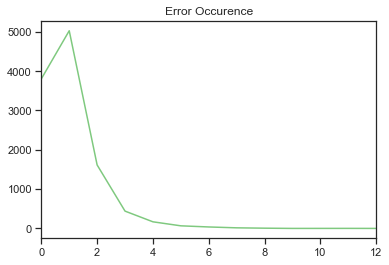

In [153]:
# Plot how many time the error occured
predictions['diff'].round().value_counts().sort_index()
predictions['diff'].round().value_counts().sort_index().plot()
plt.title('Error Occurence')